import class bandit and other functions from bandits.py

In [1]:
from bandits import Bandit, multi_armed_bandit, show_result, get_result, get_performance
import pandas as pd
import numpy as np
from tqdm import trange
import seaborn as sns
import warnings 
import random
warnings.filterwarnings("ignore")

Import data from EU dataset and US dataset

In [2]:
import pickle
with open('./dataset/EU_data.pickle', 'rb') as handle:
    data_EU = pickle.load(handle)

In [3]:
with open('./dataset/USStockData.pickle', 'rb') as handle:
    data_US = pickle.load(handle)

Performance on the EU dataset

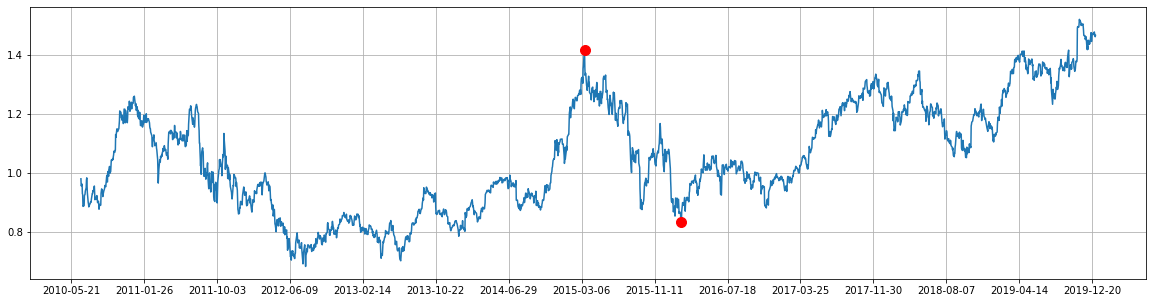

In [48]:
result, df0 = multi_armed_bandit(data_EU, epsilon=0.1,step_size=0.1, sample_averages=True, UCB_param=None, gradient=False, gradient_baseline=False)    
show_result(df0,result)

In [16]:
performance_e = pd.DataFrame()
for i in trange(500):
    result, df0 = multi_armed_bandit(data_EU, epsilon=0.1,step_size=0.1, sample_averages=True, UCB_param=None, gradient=False, gradient_baseline=False)    
    net_value = get_result(df0,result)
    performance_e = performance_e.append(get_performance(net_value))    
    
performance_UCB = pd.DataFrame()
for i in trange(500):
    result, df0 = multi_armed_bandit(data_EU, epsilon=0.1,step_size=0.1, sample_averages=True, UCB_param=2, gradient=False, gradient_baseline=False)    
    net_value = get_result(df0,result)
    performance_UCB = performance_UCB.append(get_performance(net_value))    

performance_gradient = pd.DataFrame()
for i in trange(500):
    result, df0 = multi_armed_bandit(data_EU, epsilon=0.1,step_size=0.1, sample_averages=True, UCB_param=2, gradient=False, gradient_baseline=False)    
    net_value = get_result(df0,result)
    performance_gradient = performance_gradient.append(get_performance(net_value))    


100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [03:20<00:00,  2.50it/s]


Since the bandit is a random algorithm, we use Monte Carlo Simulation to simulate 500 times and generate the evaluator of the strategy.
 
  
   
   
    






In [61]:
performance_e.mean()

Aunnualized Return             0.105935
Annualized Volatility          0.213372
Downside Deviation             0.153974
Max Drawdown(in percentage)    0.557516
Max Drawdown(in dollars)       0.496669
Sharpe Ratio                   0.489620
Sortino Ratio                  0.687329
dtype: float64

<AxesSubplot:xlabel='Aunnualized Return', ylabel='Density'>

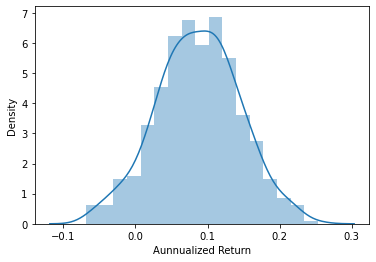

In [37]:
## plot the kernel histogram of Annualzed return for strategy epsilon greedy
sns.distplot(performance_e['Aunnualized Return'])

In [25]:
performance_UCB.mean()

Aunnualized Return             0.071600
Annualized Volatility          0.259213
Downside Deviation             0.186755
Max Drawdown(in percentage)    0.340749
Max Drawdown(in dollars)       0.936583
Sharpe Ratio                   0.276718
Sortino Ratio                  0.387248
dtype: float64

<AxesSubplot:xlabel='Aunnualized Return', ylabel='Density'>

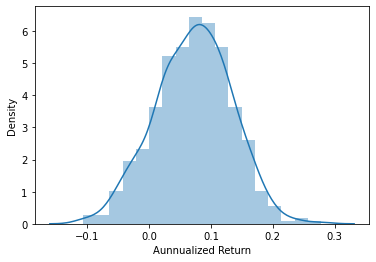

In [38]:
## plot the kernel histogram of Annualzed return for strategy UCB
sns.distplot(performance_UCB['Aunnualized Return'])

In [27]:
performance_gradient.mean()

Aunnualized Return             0.073934
Annualized Volatility          0.258687
Downside Deviation             0.186446
Max Drawdown(in percentage)    0.341812
Max Drawdown(in dollars)       0.918194
Sharpe Ratio                   0.286265
Sortino Ratio                  0.400253
dtype: float64

<AxesSubplot:xlabel='Aunnualized Return', ylabel='Density'>

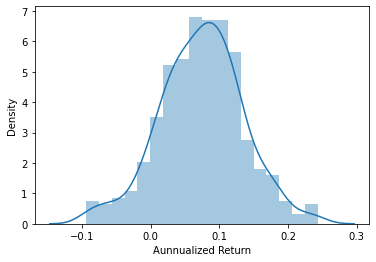

In [39]:
## plot the kernel histogram of Annualzed return for strategy gradient
sns.distplot(performance_gradient['Aunnualized Return'])

Performance on US dataset

2.158924997272788

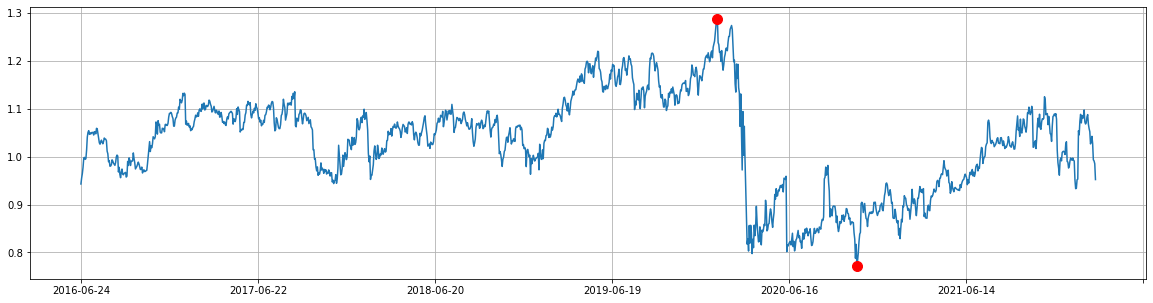

In [52]:
result, df0 = multi_armed_bandit(data_US, epsilon=0.1,step_size=0.1, sample_averages=True, UCB_param=None, gradient=False, gradient_baseline=False, America=True)    
show_result(df0,result)

In [54]:
performance_e = pd.DataFrame()
for i in trange(500):
    result, df0 = multi_armed_bandit(data_EU, epsilon=0.1,step_size=0.1, sample_averages=True, UCB_param=None, gradient=False, gradient_baseline=False, America = True)    
    net_value = get_result(df0,result)
    performance_e = performance_e.append(get_performance(net_value))    
    
performance_UCB = pd.DataFrame()
for i in trange(500):
    result, df0 = multi_armed_bandit(data_EU, epsilon=0.1,step_size=0.1, sample_averages=True, UCB_param=2, gradient=False, gradient_baseline=False, America = True)    
    net_value = get_result(df0,result)
    performance_UCB = performance_UCB.append(get_performance(net_value))    

performance_gradient = pd.DataFrame()
for i in trange(500):
    result, df0 = multi_armed_bandit(data_EU, epsilon=0.1,step_size=0.1, sample_averages=True, UCB_param=2, gradient=False, gradient_baseline=False, America = True)    
    net_value = get_result(df0,result)
    performance_gradient = performance_gradient.append(get_performance(net_value))    

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [01:36<00:00,  5.16it/s]


In [55]:
performance_e.mean()

Aunnualized Return             0.105935
Annualized Volatility          0.213372
Downside Deviation             0.153974
Max Drawdown(in percentage)    0.557516
Max Drawdown(in dollars)       0.496669
Sharpe Ratio                   0.489620
Sortino Ratio                  0.687329
dtype: float64

<AxesSubplot:xlabel='Aunnualized Return', ylabel='Density'>

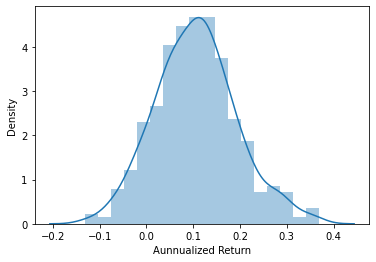

In [56]:
## plot the kernel histogram of Annualzed return for strategy epsilon greedy
sns.distplot(performance_e['Aunnualized Return'])

In [57]:
performance_UCB.mean()

Aunnualized Return             0.065709
Annualized Volatility          0.215884
Downside Deviation             0.155183
Max Drawdown(in percentage)    0.558682
Max Drawdown(in dollars)       0.433010
Sharpe Ratio                   0.305377
Sortino Ratio                  0.437921
dtype: float64

<AxesSubplot:xlabel='Aunnualized Return', ylabel='Density'>

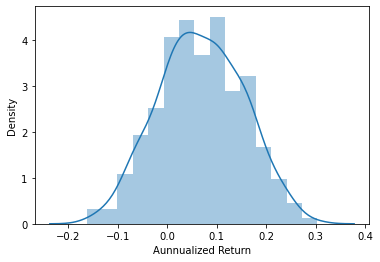

In [58]:
## plot the kernel histogram of Annualzed return for strategy gradient
sns.distplot(performance_gradient['Aunnualized Return'])

In [59]:
performance_gradient.mean()

Aunnualized Return             0.067862
Annualized Volatility          0.214846
Downside Deviation             0.154437
Max Drawdown(in percentage)    0.564605
Max Drawdown(in dollars)       0.428249
Sharpe Ratio                   0.316940
Sortino Ratio                  0.450028
dtype: float64

<AxesSubplot:xlabel='Aunnualized Return', ylabel='Density'>

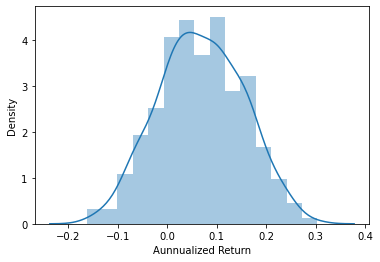

In [60]:
## plot the kernel histogram of Annualzed return for strategy gradient
sns.distplot(performance_gradient['Aunnualized Return'])

Other strategy for comparasion:

Equal Weighted portfolio

Momentum Factor based portfolio

In [4]:
from strategy import mom, EW

Annualized Return:  10.307049705421418 %
Annualized Volatility:  27.881012025859587 %
Downside Deviation:  20.966130504877775 %
Max Drawdown(in percentage):  22.176567124799472 %
Max Drawdown(in dollars):  1.6870331999999997
Sharpe Ratio:  0.3696798988451943
Sortino Ratio:  0.49160476717549195


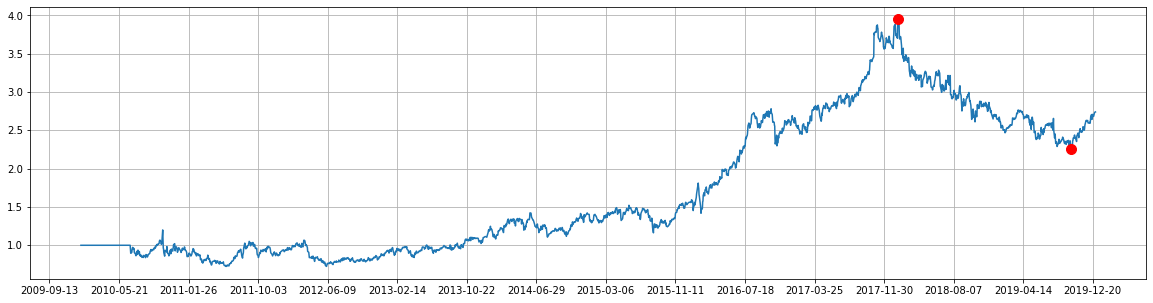

In [5]:
mom(data_EU) ##Momentum strategy ON EU dataset

Annualized Return:  31.116476098345565 %
Annualized Volatility:  36.136673867480965 %
Downside Deviation:  25.392843850312772 %
Max Drawdown(in percentage):  17.166464806345772 %
Max Drawdown(in dollars):  2.385027
Sharpe Ratio:  0.8610774808012137
Sortino Ratio:  1.2254033570155747


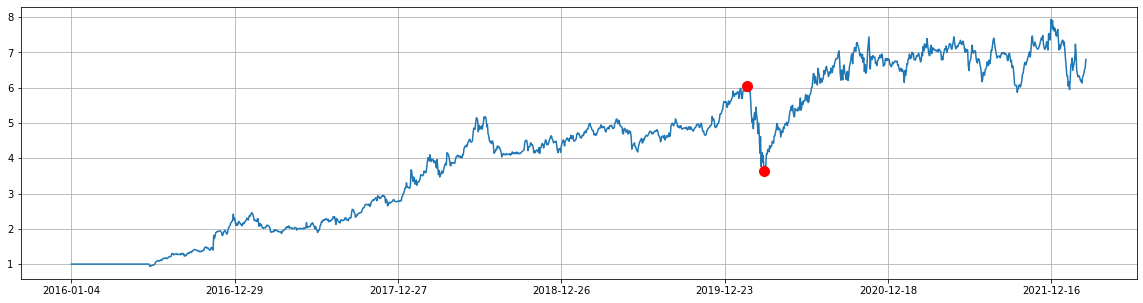

In [7]:
mom(data_US, America=True) ##Momentum strategy ON US dataset

Annualized Return:  12.021949421051632 %
Annualized Volatility:  17.692705974323584 %
Downside Deviation:  12.852636997578784 %
Max Drawdown(in percentage):  32.612471856136814 %
Max Drawdown(in dollars):  18.80004933833333
Sharpe Ratio:  0.6794861926998845
Sortino Ratio:  0.9353683157251201


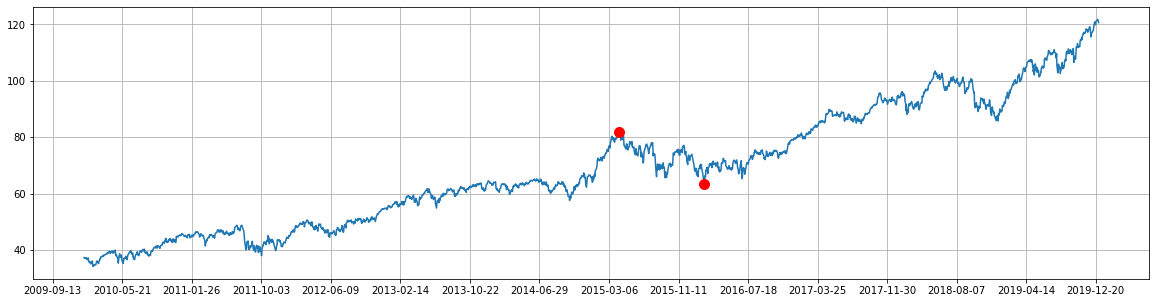

In [6]:
EW(data_EU) ##Equal weight strategy ON EU dataset

Annualized Return:  15.507655499327727 %
Annualized Volatility:  19.860846666111584 %
Downside Deviation:  14.069236309522962 %
Max Drawdown(in percentage):  30.549385680880924 %
Max Drawdown(in dollars):  64.44541666666657
Sharpe Ratio:  0.7808154284675247
Sortino Ratio:  1.1022386118307752


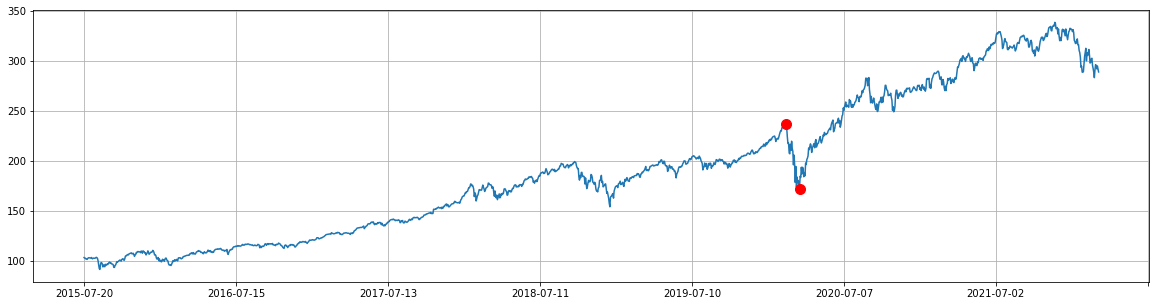

In [7]:
EW(data_US)##Equal weight strategy ON US dataset